An example producing filled contour maps, scatter maps and color bars at specified locations on the page

This makes use of 
- ./CASutils/maplot_utils.py to plot the maps
- ./CASutils/colorbar_utils.py to plot the color bars
- ./CASutils/colormap_utils.py is used to make a custon color bar

In [76]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np

from CASutils import colormap_utils as mycolors
from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars


importlib.reload(mycolors)
importlib.reload(maps)
importlib.reload(cbars)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

read in the data

In [3]:
bestpath="/project/cas/islas/savs/python/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_BEST.nc"
best = xr.open_dataset(bestpath)

In [4]:
isdpath="/project/cas/islas/savs/python/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ISD.nc"
isd=xr.open_dataset(isdpath)e

In [10]:
era5path = "/project/cas/islas/savs/python/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ERA5.nc"
era5 = xr.open_dataset(era5path)

In [5]:
goga1path="/project/cas/islas/savs/python/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA1.nc"
goga1 = xr.open_dataset(goga1path)
goga1varm = goga1.goga1var.mean('Member')

In [6]:
goga2path="/project/cas/islas/savs/python/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA2.nc"
goga2 = xr.open_dataset(goga2path)
goga2varm = goga2.goga1var.mean('Member')

plot the plots

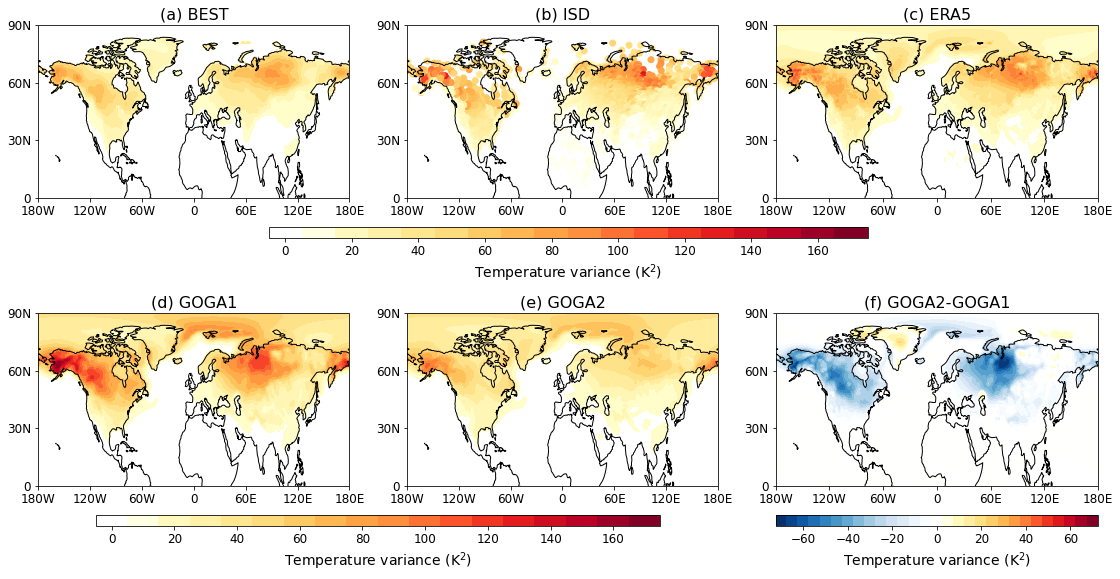

In [93]:
fig = plt.figure(figsize=(16,16))
ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(best.bestvar), np.array(best.longitude), np.array(best.latitude), 10, -170, 170, '(a) BEST',0.05,0.32,0.8,0.95)
ax2 = maps.contourmap_bothcontinents_scatter_nh_pos(fig, np.array(isd.isdvar), np.array(isd.lon), np.array(isd.lat), 10, -170, 170, '(b) ISD',0.37,0.64,0.8,0.95) 
ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(era5.era5var), np.array(era5.lon), np.array(era5.lat), 10, -170, 170, '(c) ERA5', 0.69,0.97,0.8,0.95)
ax4 = cbars.plotcolorbar(fig, 10, -170, 170,'Temperature variance (K$^{2}$)',0.05+0.2,0.97-0.2,0.765,0.775,posneg='pos', ticks=([0,20,40,60,80,100,120,140,160]), fsize=12)

ax5 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga1varm), np.array(goga1varm.lon), np.array(goga1varm.lat), 10, -170, 170, '(d) GOGA1', 0.05, 0.32, 0.55, 0.7)
ax6 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga2varm), np.array(goga2varm.lon), np.array(goga2varm.lat), 10, -170, 170, '(e) GOGA2', 0.37, 0.64, 0.55, 0.7)
ax7 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga2varm)-np.array(goga1varm), np.array(goga1varm.lon), np.array(goga1varm.lat),
                                                5,-70,70,'(f) GOGA2-GOGA1', 0.69,0.97,0.55,0.7)

ax8 = cbars.plotcolorbar(fig, 10, -170, 170,'Temperature variance (K$^{2}$)',0.05+0.05,0.64-0.05,0.515, 0.525, posneg='pos',ticks=([0,20,40,60,80,100,120,140,160]), fsize=12)
ax9 = cbars.plotcolorbar(fig, 5, -70, 70,'Temperature variance (K$^{2}$)',0.69,0.97,0.515,0.525, ticks=([-60,-40,-20,0,20,40,60]), fsize=12)